<a href="https://colab.research.google.com/github/DAOTHANHTRONG/BAITAPVENHA1/blob/main/VanTay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img, img_to_array

folder = 'drive/MyDrive/VanTay1/'

photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('A'):
    output = 1.0
  if file.startswith('B'):
    output = 2.0
  if file.startswith('C'):
    output = 3.0
  if file.startswith('D'):
    output = 4.0

  photo = load_img(folder + file, target_size =(150,150))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
# Train
photos_train = asarray(photos)
labels_train = asarray(labels)
print(photos_train.shape,labels_train.shape)

(232, 150, 150, 3) (232,)


In [ ]:
folder = 'drive/MyDrive/VanTayTest1/'

photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('A'):
    output = 1.0
  if file.startswith('B'):
    output = 2.0
  if file.startswith('C'):
    output = 3.0
  if file.startswith('D'):
    output = 4.0

  photo = load_img(folder + file, target_size =(150,150))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
# Test
photos_test = asarray(photos)
labels_test = asarray(labels)
print(photos_test.shape,labels_test.shape)

(47, 150, 150, 3) (47,)


In [ ]:
class_VanTay = {1: 'Kĩ sư',2: 'Bác sĩ',3: 'Giáo Viên',
                4: 'kế Toán'}

In [ ]:
#Reshape the sets and rescale within the byte range
photos_train = photos_train.reshape(232,150,150,3)
photos_train = photos_train.astype('float32')/255
photos_test = photos_test.reshape(47, 150,150, 3)
photos_test = photos_test.astype('float32')/255
# One-hot encode the target classes
from keras.utils import to_categorical 
labels_train = to_categorical(labels_train)
labels_test = to_categorical(labels_test)

In [ ]:
(photos_train.shape, labels_train.shape),(photos_test.shape, labels_test.shape)

(((232, 150, 150, 3), (232, 5)), ((47, 150, 150, 3), (47, 5)))

In [ ]:
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization
from keras.models import Sequential,Model
from keras import Input
from keras.layers import LeakyReLU
from keras.optimizers import Adam

batch_size = 128
epochs = 20
classes = 5

model = Sequential()
# CNN
model.add(Conv2D(32,kernel_size=(3,3), kernel_initializer='he_uniform',activation='linear',input_shape=(150,150,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(64,(3,3), kernel_initializer='he_uniform',activation = 'relu',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Conv2D(128,(3,3), kernel_initializer='he_uniform',activation = 'relu', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding= 'same'))

# ANN
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes ,activation = 'softmax'))

# Compile
model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

train = model.fit(photos_train, labels_train, batch_size = batch_size ,epochs = epochs, verbose = 1)
test_loss, test_acc = model.evaluate(photos_test, labels_test)
print('Do chinh xac cua ham', test_acc)
print('Ham mat mat', test_loss)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                    

In [ ]:
model.save('drive/MyDrive/modelVanTay1.h5')

1/1 [==============================] - 0s 22ms/step
Predicted:  Kĩ sư


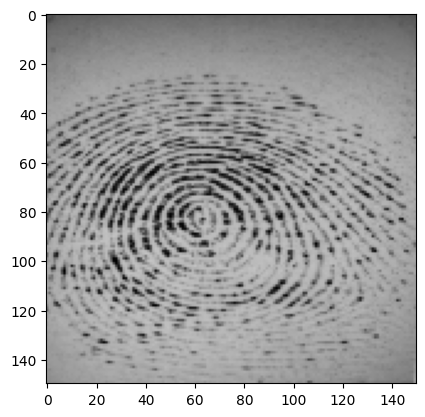

In [ ]:
#test
import matplotlib.pyplot as plt
import numpy as np 
filePath = '/content/drive/MyDrive/kisu.jpg'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(150,150))
arrayImage = img_to_array(testImage).reshape(1,150,150,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", class_VanTay[pred])
plt.imshow(testImage)

1/1 [==============================] - 0s 24ms/step
Predicted:  Giáo Viên


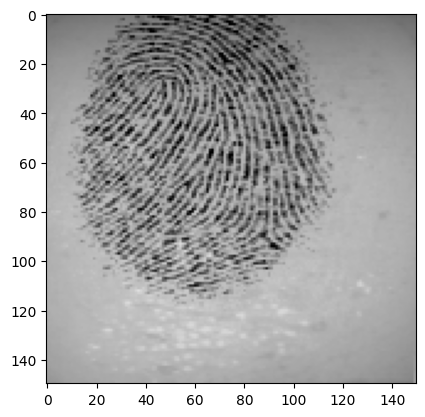

In [ ]:
filePath = '/content/drive/MyDrive/giaovien.jpg'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(150,150))
arrayImage = img_to_array(testImage).reshape(1,150,150,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", class_VanTay[pred])
plt.imshow(testImage)

1/1 [==============================] - 0s 21ms/step
Predicted:  kế Toán


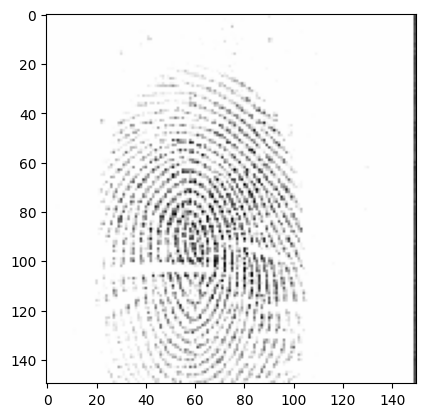

In [ ]:
filePath = '/content/drive/MyDrive/ketoan.jpg'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(150,150))
arrayImage = img_to_array(testImage).reshape(1,150,150,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", class_VanTay[pred])
plt.imshow(testImage)